<h3>Implementation of "Addessing the Curse of Imbalanced Training Sets: One-Sided Selection"</h3>

In [50]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from scipy.stats import mode
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
def plot_data(X,y, title = ""):
    x_1 = [sample[0] for sample in X]
    x_2 = [sample[1] for sample in X]
    df = pd.DataFrame()
    df['x_1']=x_1
    df['x_2']=x_2
    df['y']=y
    sns.lmplot(x='x_1', y='x_2', data=df, hue='y', fit_reg = False)
    ax = plt.gca()
    ax.set_title(title)

In [114]:
def TomekLinkSelection(X, y, metric='l2', random_state = 0):
    if(mode(y)[0][0]==0):
        minority = 1
    else:
        minority = 0
        
    sample_index = []
    positive_index = []
    for index, y_value in enumerate(y):
        if(y_value==minority):
            positive_index.append(index)
    sample_index = positive_index
    while True:
        random_negative_index = random.randint(0, len(y)-1)
        if(random_negative_index not in sample_index):
            sample_index.append(random_negative_index)
            break
   
    training_samples_X = [X[index] for index in sample_index]
    training_samples_y = [y[index] for index in sample_index]
    plot_data(training_samples_X,training_samples_y, title="Positive Example w/ One Negative Example")
    
    
    
    misclassified_index = []
    KN_clf = KNeighborsClassifier(n_neighbors=1)
    KN_clf.fit(training_samples_X,  training_samples_y)
    KN_clf_pred =  KN_clf.predict(X)
    for index, result in enumerate(KN_clf_pred):
        if(y[index]!=result):
            misclassified_index.append(index)

    C = sample_index + misclassified_index
    
    C_X = [X[index] for index in C]
    C_y = [y[index] for index in C]
    plot_data(C_X,C_y, title="Previous Graph with Misclassified Data Points")
    
    
    kneighbor = NearestNeighbors(n_neighbors=2)
    kneighbor.fit(X)
    kneighbors = [neighbor[1] for neighbor in kneighbor.kneighbors(X)[1]]
    
    
    tomek_link_index = []
    print(kneighbors)
    for index, neighbor_index in enumerate(kneighbors):
        if(kneighbors[neighbor_index] == index and y[neighbor_index] != y[index]):
            tomek_link_index.append(index)
    print(tomek_link_index)
    X_T = [X[index] for index in C if (index in positive_index or index not in tomek_link_index)]
    y_T = [y[index] for index in C if (index in positive_index or index not in tomek_link_index)]

    return X_T, y_T

In [134]:
number_of_entry = 120
X = [[random.gauss(2,0.3),random.gauss(2,0.3)] for i in range(int(number_of_entry/8)) ]
X += [[random.gauss(2,0.3),random.gauss(3,0.3)] for i in range(int(7*number_of_entry/8))]
y = [0 if i >=number_of_entry/8 else 1 for i in range(number_of_entry)]

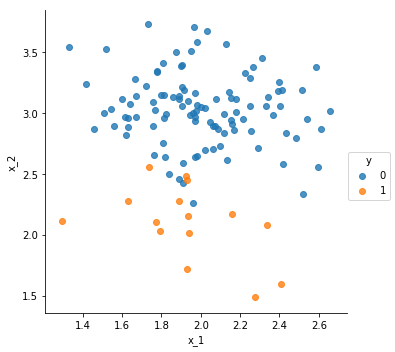

In [135]:
plot_data(X,y)

[69, 7, 6, 12, 3, 69, 0, 1, 14, 4, 44, 52, 3, 11, 8, 108, 26, 42, 43, 92, 52, 44, 95, 106, 98, 29, 25, 46, 42, 25, 44, 57, 100, 90, 17, 94, 60, 64, 61, 43, 29, 58, 17, 18, 30, 60, 63, 70, 96, 77, 118, 43, 11, 98, 97, 53, 65, 97, 41, 109, 45, 38, 68, 46, 89, 66, 65, 113, 62, 5, 114, 79, 112, 93, 92, 101, 83, 112, 32, 117, 20, 58, 94, 56, 58, 31, 101, 110, 29, 64, 33, 100, 74, 73, 82, 22, 48, 54, 92, 105, 91, 86, 101, 90, 16, 114, 23, 67, 112, 59, 87, 96, 108, 67, 105, 93, 89, 104, 50, 88]
[5, 11, 52, 69]


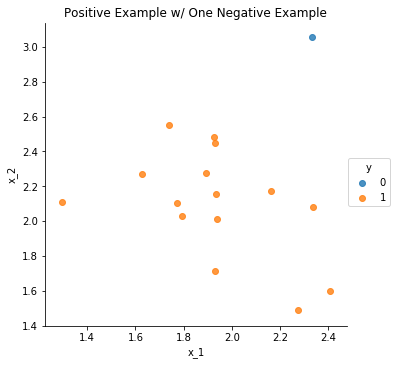

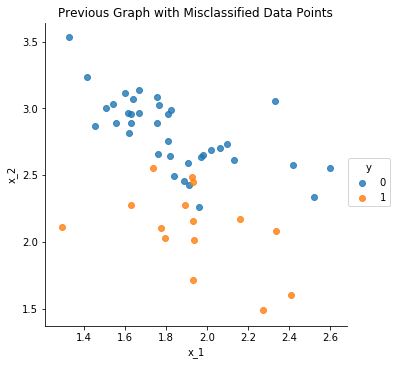

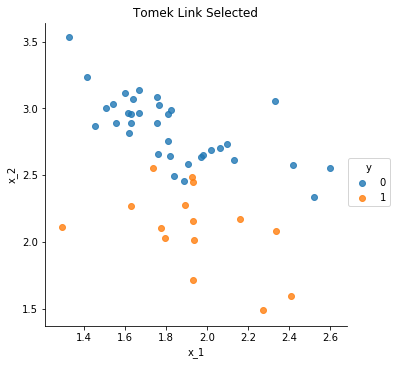

In [136]:
X_T, y_T = TomekLinkSelection(X, y)
plot_data(X_T,y_T, "Tomek Link Selected")